In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Get the csv  data nd print head
df=pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
#print summary
print('shape      >',df.shape)
print('Each column and data type and itsa count','\n')
df.info()

shape      > (1000, 40)
Each column and data type and itsa count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_oc

.Total 1000 rows and 40 columns.      

So, first we have to encode those  columns whose datatype is object as model only accecpt Numeric type data.

In [4]:
#Drop policy_bind_date as it is not beneficial for creating model
df=df.drop(['policy_bind_date','incident_location','_c39'],axis=1)
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [5]:
#Importing OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [6]:
#Encoding policy_state
ord_encoder=OrdinalEncoder(categories=[['OH','IN','IL']])
df1=ord_encoder.fit_transform(df[['policy_state']])
df1

array([[0.],
       [1.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],

In [7]:
#Encoding  policy_csl 
ord_encoder=OrdinalEncoder(categories=[['250/500','100/300','500/1000']])
df2=ord_encoder.fit_transform(df[['policy_csl']])
df2

array([[0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],

In [8]:
#Encoding  insured_sex 
ord_encoder=OrdinalEncoder(categories=[['MALE','FEMALE']])
df3=ord_encoder.fit_transform(df[['insured_sex']])
df3

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [9]:
#Encoding  insured_education_level
ord_encoder=OrdinalEncoder(categories=[['MD','PhD','Associate','Masters','High School','JD','College']])
df4=ord_encoder.fit_transform(df[['insured_education_level']])
df4

array([[0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [3.],
       [4.],
       [0.],
       [0.],
       [6.],
       [0.],
       [6.],
       [4.],
       [0.],
       [4.],
       [5.],
       [2.],
       [4.],
       [0.],
       [6.],
       [3.],
       [4.],
       [5.],
       [5.],
       [1.],
       [3.],
       [5.],
       [2.],
       [4.],
       [1.],
       [4.],
       [3.],
       [5.],
       [0.],
       [5.],
       [2.],
       [2.],
       [6.],
       [1.],
       [5.],
       [0.],
       [2.],
       [6.],
       [1.],
       [3.],
       [0.],
       [5.],
       [6.],
       [5.],
       [1.],
       [1.],
       [1.],
       [3.],
       [1.],
       [0.],
       [1.],
       [5.],
       [4.],
       [5.],
       [1.],
       [0.],
       [4.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [6.],
       [2.],
       [4.],
       [6.],

In [10]:
#Encoding  insured_occupation
ord_encoder=OrdinalEncoder(categories=[['craft-repair','machine-op-inspct','sales','armed-forces','prof-specialty','handlers-cleaners','tech-support','exec-managerial','transport-moving','priv-house-serv','adm-clerical','farming-fishing', 'protective-serv', 'other-service']])
df5=ord_encoder.fit_transform(df[['insured_occupation']])
df5

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 2.],
       [ 6.],
       [ 4.],
       [ 6.],
       [13.],
       [ 9.],
       [ 7.],
       [ 7.],
       [12.],
       [ 3.],
       [ 1.],
       [ 8.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 5.],
       [13.],
       [ 1.],
       [ 4.],
       [ 9.],
       [ 0.],
       [ 2.],
       [ 4.],
       [ 7.],
       [ 2.],
       [ 1.],
       [ 4.],
       [ 0.],
       [10.],
       [11.],
       [ 4.],
       [ 0.],
       [12.],
       [ 9.],
       [ 0.],
       [ 6.],
       [ 6.],
       [ 8.],
       [ 4.],
       [ 8.],
       [ 9.],
       [12.],
       [13.],
       [13.],
       [12.],
       [ 7.],
       [13.],
       [11.],
       [ 3.],
       [ 9.],
       [ 1.],
       [ 0.],
       [ 4.],
       [10.],
       [13.],
       [10.],
       [ 1.],
       [ 5.],
       [ 3.],
       [ 8.],
       [ 2.],
       [ 7.],
       [ 6.],
       [10.],
       [ 1.],
       [13.],
       [ 4.],
      

In [11]:
#Encoding  insured_hobbies
ord_encoder=OrdinalEncoder(categories=[['sleeping','reading','yachting', 'skydiving', 'board-games', 'hiking', 'exercise', 'golf', 'cross-fit', 'kayaking', 'movies', 'polo', 'chess', 'video-games', 'base-jumping', 'bungie-jumping', 'basketball', 'paintball', 'dancing', 'camping']])
df6=ord_encoder.fit_transform(df[['insured_hobbies']])
df6

array([[ 0.],
       [ 1.],
       [ 4.],
       [ 4.],
       [ 4.],
       [15.],
       [ 4.],
       [14.],
       [ 7.],
       [19.],
       [18.],
       [ 3.],
       [ 1.],
       [15.],
       [ 4.],
       [10.],
       [ 5.],
       [ 1.],
       [ 2.],
       [19.],
       [15.],
       [ 3.],
       [17.],
       [12.],
       [ 9.],
       [11.],
       [ 7.],
       [12.],
       [ 9.],
       [16.],
       [13.],
       [ 1.],
       [ 2.],
       [13.],
       [ 2.],
       [ 1.],
       [19.],
       [ 7.],
       [15.],
       [13.],
       [ 9.],
       [12.],
       [ 5.],
       [ 1.],
       [ 1.],
       [ 2.],
       [11.],
       [ 9.],
       [18.],
       [10.],
       [15.],
       [11.],
       [16.],
       [10.],
       [10.],
       [ 3.],
       [12.],
       [ 5.],
       [ 2.],
       [ 9.],
       [14.],
       [16.],
       [15.],
       [13.],
       [12.],
       [12.],
       [17.],
       [ 1.],
       [10.],
       [ 9.],
       [ 0.],
      

In [12]:
#Encoding  insured_relationship
ord_encoder=OrdinalEncoder(categories=[['husband','unmarried', 'not-in-family', 'wife', 'other-relative', 'own-child']])
df7=ord_encoder.fit_transform(df[['insured_relationship']])
df7

array([[0.],
       [4.],
       [5.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [5.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [2.],
       [4.],
       [5.],
       [1.],
       [4.],
       [5.],
       [5.],
       [5.],
       [4.],
       [5.],
       [0.],
       [5.],
       [5.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [4.],
       [3.],
       [5.],
       [2.],
       [1.],
       [1.],
       [1.],
       [3.],
       [2.],
       [1.],
       [0.],
       [5.],
       [1.],
       [0.],
       [0.],
       [0.],
       [4.],
       [3.],
       [5.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [5.],
       [0.],
       [5.],
       [4.],
       [0.],
       [1.],
       [5.],
       [2.],
       [4.],
       [2.],
       [1.],
       [5.],
       [5.],
       [5.],
       [2.],
       [0.],
       [2.],
       [3.],
       [4.],
       [0.],

In [13]:
#Encoding  incident_date
ord_encoder=OrdinalEncoder(categories=[['25-01-2015','18-02-2015', '08-01-2015', '03-01-2015', '17-01-2015', '22-01-2015', '20-02-2015', '02-01-2015', '19-02-2015', '23-02-2015', '26-01-2015', '10-01-2015', '27-01-2015', '07-02-2015', '07-01-2015', '20-01-2015', '15-01-2015', '12-02-2015', '01-02-2015', '28-01-2015', '01-01-2015', '13-01-2015', '09-01-2015', '10-02-2015', '22-02-2015', '28-02-2015', '15-02-2015', '26-02-2015', '23-01-2015', '24-02-2015', '04-01-2015', '25-02-2015', '03-02-2015', '27-02-2015', '17-02-2015', '08-02-2015', '04-02-2015', '11-02-2015', '05-01-2015', '24-01-2015', '30-01-2015', '21-01-2015', '06-01-2015', '21-02-2015', '14-01-2015', '14-02-2015', '16-01-2015', '18-01-2015', '09-02-2015', '12-01-2015', '16-02-2015', '01-03-2015', '19-01-2015', '06-02-2015', '02-02-2015', '29-01-2015', '05-02-2015', '11-01-2015', '13-02-2015', '31-01-2015']])
df8=ord_encoder.fit_transform(df[['incident_date']])
df8

array([[ 0.],
       [41.],
       [24.],
       [11.],
       [34.],
       [ 7.],
       [21.],
       [33.],
       [40.],
       [38.],
       [42.],
       [26.],
       [ 5.],
       [ 2.],
       [16.],
       [55.],
       [24.],
       [42.],
       [52.],
       [24.],
       [20.],
       [23.],
       [57.],
       [52.],
       [29.],
       [22.],
       [19.],
       [14.],
       [ 2.],
       [26.],
       [47.],
       [25.],
       [29.],
       [22.],
       [17.],
       [39.],
       [22.],
       [47.],
       [41.],
       [ 2.],
       [ 3.],
       [20.],
       [46.],
       [23.],
       [45.],
       [43.],
       [ 1.],
       [11.],
       [27.],
       [20.],
       [ 3.],
       [ 4.],
       [24.],
       [12.],
       [33.],
       [42.],
       [25.],
       [24.],
       [14.],
       [42.],
       [11.],
       [37.],
       [49.],
       [53.],
       [15.],
       [24.],
       [40.],
       [54.],
       [11.],
       [33.],
       [ 6.],
      

In [14]:
#Encoding incident_type
ord_encoder=OrdinalEncoder(categories=[['Single Vehicle Collision','Multi-vehicle Collision', 'Vehicle Theft', 'Parked Car']])
df9=ord_encoder.fit_transform(df[['incident_type']])
df9

array([[0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [3.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [3.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [3.],
       [0.],
       [1.],
       [3.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],

In [15]:
#Encoding collision_type
ord_encoder=OrdinalEncoder(categories=[['Side Collisio','Rear Collision', 'Side Collision', '?', 'Front Collision']])
df10=ord_encoder.fit_transform(df[['collision_type']])
df10

array([[2.],
       [3.],
       [1.],
       [4.],
       [3.],
       [1.],
       [4.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [1.],
       [3.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [4.],
       [1.],
       [1.],
       [3.],
       [3.],
       [2.],
       [1.],
       [2.],
       [2.],
       [4.],
       [4.],
       [2.],
       [4.],
       [1.],
       [3.],
       [1.],
       [4.],
       [1.],
       [2.],
       [2.],
       [1.],
       [4.],
       [1.],
       [1.],
       [4.],
       [3.],
       [1.],
       [4.],
       [3.],
       [3.],
       [2.],
       [3.],
       [1.],
       [4.],
       [3.],
       [4.],
       [2.],
       [1.],
       [2.],
       [2.],
       [4.],
       [1.],
       [4.],
       [2.],
       [2.],
       [4.],
       [3.],
       [2.],
       [4.],
       [1.],
       [1.],
       [2.],
       [4.],
       [4.],

In [16]:
#Encoding incident_severity
ord_encoder=OrdinalEncoder(categories=[['Major Damage','Total Loss', 'Trivial Damage', 'Minor Damage']])
df11=ord_encoder.fit_transform(df[['incident_severity']])
df11

array([[0.],
       [3.],
       [3.],
       [0.],
       [3.],
       [0.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [3.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [3.],
       [1.],
       [0.],
       [1.],
       [3.],
       [0.],
       [3.],
       [3.],
       [3.],
       [3.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [3.],
       [0.],
       [3.],
       [1.],
       [3.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [3.],
       [2.],
       [3.],
       [0.],
       [3.],
       [3.],
       [0.],
       [3.],
       [1.],
       [3.],
       [0.],
       [1.],
       [3.],
       [0.],
       [1.],
       [3.],
       [3.],
       [3.],
       [0.],
       [3.],
       [0.],
       [1.],
       [3.],
       [3.],
       [3.],
       [1.],
       [3.],

In [17]:
#Encoding authorities_contacted
ord_encoder=OrdinalEncoder(categories=[['Police','Ambulance', 'Other', 'None', 'Fire']])
df12=ord_encoder.fit_transform(df[['authorities_contacted']])
df12

array([[0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [4.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [4.],
       [1.],
       [3.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [3.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [4.],
       [2.],
       [0.],
       [3.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [4.],
       [4.],
       [0.],
       [2.],
       [4.],
       [3.],
       [3.],
       [0.],
       [0.],
       [4.],
       [4.],
       [3.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [1.],
       [3.],
       [2.],
       [2.],
       [1.],
       [4.],
       [1.],
       [1.],
       [4.],

In [18]:
#Encoding incident_state
ord_encoder=OrdinalEncoder(categories=[['SC','WV', 'VA', 'NY', 'OH', 'NC', 'PA']])
df13=ord_encoder.fit_transform(df[['incident_state']])
df13

array([[0.],
       [2.],
       [3.],
       [4.],
       [3.],
       [0.],
       [3.],
       [2.],
       [1.],
       [5.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [3.],
       [1.],
       [3.],
       [2.],
       [3.],
       [0.],
       [0.],
       [1.],
       [2.],
       [4.],
       [6.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [3.],
       [1.],
       [3.],
       [5.],
       [1.],
       [1.],
       [0.],
       [5.],
       [0.],
       [3.],
       [5.],
       [1.],
       [3.],
       [1.],
       [3.],
       [3.],
       [1.],
       [5.],
       [2.],
       [3.],
       [0.],
       [2.],
       [1.],
       [2.],
       [3.],
       [4.],
       [1.],
       [1.],
       [2.],
       [3.],
       [0.],
       [1.],
       [1.],
       [5.],
       [0.],
       [1.],
       [5.],
       [0.],
       [2.],
       [0.],
       [3.],

In [19]:
#Encoding incident_city
ord_encoder=OrdinalEncoder(categories=[['Columbus','Riverwood', 'Northbrook', 'Arlington', 'Northbend', 'Hillsdale', 'Springfield']])
df14=ord_encoder.fit_transform(df[['incident_city']])
df14

array([[0.],
       [1.],
       [0.],
       [3.],
       [3.],
       [3.],
       [6.],
       [0.],
       [3.],
       [5.],
       [4.],
       [6.],
       [4.],
       [6.],
       [6.],
       [5.],
       [1.],
       [4.],
       [2.],
       [0.],
       [0.],
       [3.],
       [5.],
       [4.],
       [1.],
       [3.],
       [3.],
       [2.],
       [4.],
       [2.],
       [0.],
       [1.],
       [3.],
       [5.],
       [5.],
       [6.],
       [2.],
       [3.],
       [5.],
       [0.],
       [0.],
       [2.],
       [6.],
       [3.],
       [6.],
       [3.],
       [4.],
       [3.],
       [3.],
       [6.],
       [1.],
       [3.],
       [4.],
       [0.],
       [4.],
       [3.],
       [0.],
       [1.],
       [1.],
       [5.],
       [6.],
       [6.],
       [5.],
       [4.],
       [1.],
       [3.],
       [6.],
       [5.],
       [2.],
       [1.],
       [5.],
       [2.],
       [3.],
       [1.],
       [6.],
       [1.],
       [6.],

In [20]:
#Encoding property_damage
ord_encoder=OrdinalEncoder(categories=[['YES','?', 'NO']])
df15=ord_encoder.fit_transform(df[['property_damage']])
df15

array([[0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],

In [21]:
#Encoding police_report_available
ord_encoder=OrdinalEncoder(categories=[['YES','?', 'NO']])
df16=ord_encoder.fit_transform(df[['police_report_available']])
df16

array([[0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],

In [22]:
#Encoding auto_make
ord_encoder=OrdinalEncoder(categories=[['Saab','Chevrolet', 'Mercedes', 'Toyota', 'Jeep', 'Suburu', 'Volkswagen', 'Dodge', 'Honda', 'BMW', 'Audi', 'Nissan', 'Ford', 'Accura']])
df17=ord_encoder.fit_transform(df[['auto_make']])
df17

array([[ 0.],
       [ 2.],
       [ 7.],
       [ 1.],
       [13.],
       [ 0.],
       [11.],
       [10.],
       [ 3.],
       [ 0.],
       [12.],
       [10.],
       [ 0.],
       [ 3.],
       [ 7.],
       [13.],
       [11.],
       [ 5.],
       [13.],
       [11.],
       [ 5.],
       [13.],
       [ 5.],
       [ 7.],
       [12.],
       [12.],
       [ 3.],
       [ 5.],
       [ 7.],
       [13.],
       [ 3.],
       [12.],
       [ 9.],
       [ 5.],
       [10.],
       [ 2.],
       [ 5.],
       [ 5.],
       [ 4.],
       [11.],
       [ 9.],
       [ 9.],
       [ 7.],
       [ 2.],
       [ 3.],
       [13.],
       [ 8.],
       [10.],
       [ 6.],
       [ 2.],
       [11.],
       [ 9.],
       [ 3.],
       [ 5.],
       [12.],
       [ 1.],
       [ 8.],
       [ 1.],
       [ 0.],
       [12.],
       [11.],
       [ 8.],
       [ 9.],
       [ 5.],
       [12.],
       [ 7.],
       [10.],
       [ 9.],
       [10.],
       [12.],
       [10.],
      

In [23]:
#Encoding auto_model
ord_encoder=OrdinalEncoder(categories=[['92x','Tahoe', 'Accord', '95', 'X6', 'X5', 'Wrangler', 'Malibu', 'A5', 'E400', 'A3', 'MDX', 'CRV', 'TL', 'Pathfinder', 'Corolla', 'M5', 'Jetta', 'Maxima', '3 Series', 'Escape', 'Impreza', 'F150', 'Forrestor', 'Legacy', 'Neon', 'Ultima', 'C300', 'RSX', 'Camry', 'Highlander', 'Fusion', 'ML350', 'Grand Cherokee', 'RAM', 'Silverado', 'Passat', 'Civic', '93']])
df18=ord_encoder.fit_transform(df[['auto_model']])
df18

array([[ 0.],
       [ 9.],
       [34.],
       [ 1.],
       [28.],
       [ 3.],
       [14.],
       [ 8.],
       [29.],
       [ 0.],
       [22.],
       [10.],
       [ 3.],
       [30.],
       [25.],
       [11.],
       [18.],
       [24.],
       [13.],
       [14.],
       [21.],
       [28.],
       [23.],
       [34.],
       [20.],
       [20.],
       [29.],
       [23.],
       [25.],
       [13.],
       [15.],
       [22.],
       [19.],
       [21.],
       [10.],
       [27.],
       [23.],
       [24.],
       [ 6.],
       [14.],
       [16.],
       [ 5.],
       [34.],
       [ 9.],
       [30.],
       [11.],
       [37.],
       [10.],
       [36.],
       [27.],
       [14.],
       [16.],
       [15.],
       [23.],
       [22.],
       [35.],
       [12.],
       [35.],
       [38.],
       [20.],
       [18.],
       [ 2.],
       [16.],
       [24.],
       [20.],
       [25.],
       [ 8.],
       [ 4.],
       [ 8.],
       [22.],
       [10.],
      

In [24]:
#OverRiding encoded column in dataframe
df['policy_state']=df1
df['policy_csl']=df2
df['insured_sex']=df3
df['insured_education_level']=df4
df['insured_occupation']=df5
df['insured_hobbies']=df6
df['insured_relationship']=df7
df['incident_date']=df8
df['incident_type']=df9
df['collision_type']=df10
df['incident_severity']=df11
df['authorities_contacted']=df12
df['incident_state']=df13
df['incident_city']=df14
df['property_damage']=df15
df['police_report_available']=df16
df['auto_make']=df17
df['auto_model']=df18
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,0.0,0.0,1000,1406.91,0,466132,0.0,...,2,0.0,71610,6510,13020,52080,0.0,0.0,2004,Y
1,228,42,342868,1.0,0.0,2000,1197.22,5000000,468176,0.0,...,0,1.0,5070,780,780,3510,2.0,9.0,2007,Y
2,134,29,687698,0.0,1.0,2000,1413.14,5000000,430632,1.0,...,3,2.0,34650,7700,3850,23100,7.0,34.0,2007,N
3,256,41,227811,2.0,0.0,2000,1415.74,6000000,608117,1.0,...,2,2.0,63400,6340,6340,50720,1.0,1.0,2014,Y
4,228,44,367455,2.0,2.0,1000,1583.91,6000000,610706,0.0,...,1,2.0,6500,1300,650,4550,13.0,28.0,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,0.0,2.0,1000,1310.80,0,431289,1.0,...,1,1.0,87200,17440,8720,61040,8.0,2.0,2006,N
996,285,41,186934,2.0,1.0,1000,1436.79,0,608177,1.0,...,3,1.0,108480,18080,18080,72320,6.0,36.0,2015,N
997,130,34,918516,0.0,0.0,500,1383.49,3000000,442797,1.0,...,3,0.0,67500,7500,7500,52500,5.0,21.0,1996,N
998,458,62,533940,2.0,2.0,2000,1356.92,5000000,441714,0.0,...,1,0.0,46980,5220,5220,36540,10.0,8.0,1998,N


In [25]:
#DataFrame statistics
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,0.98600,0.949000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.537000,...,0.992000,1.487000,1.029000,52761.94000,7433.420000,7399.570000,37928.950000,6.436000,18.903000,2005.103000
std,115.113174,9.140287,257063.005276,0.83096,0.805635,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.068225,11.274072,6.015861
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,9.000000,2000.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,1.000000,...,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,6.000000,18.500000,2005.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000


In [26]:
#checking Imbalency
print('no fraud_reported(N)  =>',df.fraud_reported.value_counts()[0])
print('fraud_reported(Y)  =>',df.fraud_reported.value_counts()[1])

no fraud_reported(N)  => 753
fraud_reported(Y)  => 247


.Dataset is not imbalence.we are good to proceed.  

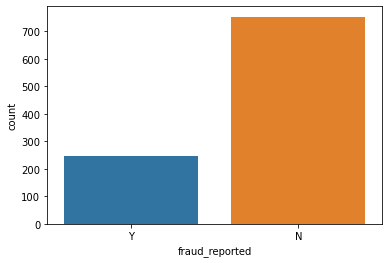

In [27]:
#plot each class frequency
sns.countplot(x='fraud_reported',data=df)
plt.show()

In [28]:
#Using SelectKBest feature Selection Method
from sklearn.feature_selection import SelectKBest,f_classif

In [29]:
#Replace label column into binary codes
df['fraud_reported']=df['fraud_reported'].replace({'No':0,'Yes':1})

In [30]:
x=df.drop(['fraud_reported'],axis=1)
y=df.fraud_reported

In [31]:
best_features=SelectKBest(score_func=f_classif,k=15)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

In [32]:
#Concatanate dataframes
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','score']

print(feature_scores.nlargest(15,'score'))

                   Feature_Name       score
19            incident_severity  194.376298
32                vehicle_claim   29.718214
29           total_claim_amount   27.463776
17                incident_type   22.843145
31               property_claim   19.327729
30                 injury_claim    8.328776
18               collision_type    4.229247
25              property_damage    3.680422
7                umbrella_limit    3.441452
24  number_of_vehicles_involved    2.689100
27                    witnesses    2.451026
12              insured_hobbies    2.398630
11           insured_occupation    1.742181
4                    policy_csl    1.719689
26              bodily_injuries    1.146656


In [33]:
#Model Building
new_x=df[['incident_severity','vehicle_claim','total_claim_amount','incident_type','property_claim','injury_claim','collision_type','property_damage','umbrella_limit','number_of_vehicles_involved','witnesses','insured_hobbies','insured_occupation','policy_csl','bodily_injuries']]

In [34]:
new_x

,incident_severity,vehicle_claim,total_claim_amount,incident_type,property_claim,injury_claim,collision_type,property_damage,umbrella_limit,number_of_vehicles_involved,witnesses,insured_hobbies,insured_occupation,policy_csl,bodily_injuries
0,0.0,52080,71610,0.0,13020,6510,2.0,0.0,0,1,2,0.0,0.0,0.0,1
1,3.0,3510,5070,2.0,780,780,3.0,1.0,5000000,1,0,1.0,1.0,0.0,0
2,3.0,23100,34650,1.0,3850,7700,1.0,2.0,5000000,3,3,4.0,2.0,1.0,2
3,0.0,50720,63400,0.0,6340,6340,4.0,1.0,6000000,1,2,4.0,3.0,0.0,1
4,3.0,4550,6500,2.0,650,1300,3.0,2.0,6000000,1,1,4.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,61040,87200,0.0,8720,17440,4.0,0.0,0,1,1,17.0,0.0,2.0,0
996,0.0,72320,108480,0.0,18080,18080,1.0,0.0,0,1,3,0.0,4.0,1.0,2
997,3.0,52500,67500,1.0,7500,7500,2.0,1.0,3000000,3,3,15.0,3.0,0.0,2
998,0.0,36540,46980,0.0,5220,5220,1.0,1.0,5000000,1,1,14.0,5.0,2.0,0


In [35]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(new_x)

In [36]:
#Building model to test unexpoed data 
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=300)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [37]:
#confusion matrix
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[172,  20],
       [ 45,  13]], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           N       0.79      0.90      0.84       192
           Y       0.39      0.22      0.29        58

    accuracy                           0.74       250
   macro avg       0.59      0.56      0.56       250
weighted avg       0.70      0.74      0.71       250



This model fits 74% of data. .Now checking that weather the model is overfitted or not.        

In [39]:
#Importing cross value score
from sklearn.model_selection import cross_val_score

In [40]:
cross_val_score(knn,x_scaler,y,cv=5)

array([0.75, 0.69, 0.76, 0.75, 0.74])

In [41]:
cross_val_score(KNeighborsClassifier(),x_scaler,y,cv=5).mean()

0.7380000000000001

As the model earlier value is  approx same so Model is not overfitted. 

In [42]:
#HyperParameter Tunning Using GridSearchCV
#Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid={'algorithm':['kd-tree','brute'],
           'leaf_size':[14,16,19,21],
           'n_neighbors':[3,4,6,8,9]
           }

In [44]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [45]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd-tree', 'brute'],
                         'leaf_size': [14, 16, 19, 21],
                         'n_neighbors': [3, 4, 6, 8, 9]})

In [46]:
 gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 14, 'n_neighbors': 8}

In [47]:
#We will use thye best parameters in our knn algorithms and check weather it improve the accuracy
knn=KNeighborsClassifier(algorithm='brute', leaf_size= 14, n_neighbors= 8)

In [48]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=14, n_neighbors=8)

In [49]:
y_pred=knn.predict(x_test)

In [50]:
cfm=confusion_matrix(y_test,y_pred)

In [51]:
cfm

array([[186,   6],
       [ 51,   7]], dtype=int64)

In [52]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           N       0.78      0.97      0.87       192
           Y       0.54      0.12      0.20        58

    accuracy                           0.77       250
   macro avg       0.66      0.54      0.53       250
weighted avg       0.73      0.77      0.71       250



.Now we can enhance the accuracy to 77 % .            

In [53]:
#Checking Outliers and removing using Z score
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(new_x))
print(z)

[[1.23878458 0.74965272 0.71425742 ... 1.53297928 1.17854195 0.00975947]
 [1.20297215 1.82334593 1.80731185 ... 1.2852851  1.17854195 1.21017372]
 [1.20297215 0.78556451 0.68636176 ... 1.03759092 0.06333576 1.22969265]
 ...
 [1.20297215 0.77190224 0.55850675 ... 0.78989674 1.17854195 1.22969265]
 [1.23878458 0.07357971 0.21910974 ... 0.29450838 1.30521347 1.21017372]
 [1.20297215 1.81434017 1.80769081 ... 1.03759092 1.17854195 1.21017372]]


In [54]:
print('Row numbers    \n',np.where(z > 3)[0])
print('columns number   \n',np.where(z > 3)[1])

Row numbers    
 [ 31  48  88 115 119 262 314 430 458 500 503 657 700 875 922 975]
columns number   
 [8 8 8 8 8 8 8 8 8 4 8 8 8 8 8 8]


In [55]:
index=(np.where(z>3)[0])
index

array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 500, 503, 657, 700,
       875, 922, 975], dtype=int64)

In [56]:
df=df.drop(df.index[index])
df.shape

(984, 37)

In [57]:
#Replace label column into binary codes
df['fraud_reported']=df['fraud_reported'].replace({'N':0,'Y':1})

In [58]:
x=df.drop(['fraud_reported'],axis=1)
y=df.fraud_reported

In [59]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [60]:
#Building model to test unexpoed data 
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=300)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [61]:
#confusion matrix
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[175,   7],
       [ 59,   5]], dtype=int64)

In [62]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       182
           1       0.42      0.08      0.13        64

    accuracy                           0.73       246
   macro avg       0.58      0.52      0.49       246
weighted avg       0.66      0.73      0.66       246



In [63]:
#plot ROC AUC for multiple models without hperparams tunning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [64]:
#Instiating all the model
lr=LogisticRegression()
kn=KNeighborsClassifier()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()

In [65]:
#training with all classifier
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

print("All model are trained")

All model are trained


In [66]:
#All models score captured
lr.score(x_test,y_test)
kn.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)

print("all models test score captured")

all models test score captured


In [67]:
#Let's find ROC AUC score
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.5956387362637363

In [68]:
#LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.6209649725274725

In [69]:
#KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.5198317307692308

In [70]:
#DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.7520604395604396

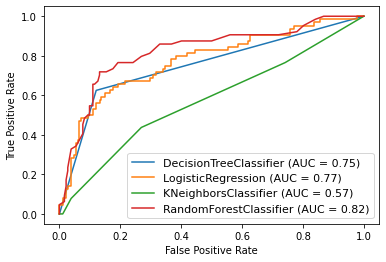

In [71]:
#Let's check ROC AUC  curve for the fitted model
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

.Hence RandomForestClassifier has max value then all other model .Hence RandomForestClassifier is good to use in this model.

In [72]:
#saving the model
import pickle
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(rf,f)